In [ ]:
!pip install pybithumb

     |████████████████████████████████| 111 kB 5.5 MB/s 
     |████████████████████████████████| 51 kB 264 kB/s 
     |████████████████████████████████| 251 kB 36.2 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import pybithumb 
import matplotlib.pyplot as plt
import datetime

In [ ]:
df=pybithumb.get_ohlcv('BTC')
df.head()

,open,high,low,close,volume
time,,,,,
2013-12-27,737000.0,755000.0,737000.0,755000.0,3.780000
2013-12-28,750000.0,750000.0,750000.0,750000.0,12.000000
2013-12-29,750000.0,750000.0,728000.0,739000.0,19.058000
2013-12-30,740000.0,772000.0,740000.0,768000.0,9.488973
2013-12-31,768000.0,800000.0,763000.0,768000.0,18.650350


In [ ]:
from os import close
sma=3
lma=7
fee=0.0032
df['SMA']=df['close'].rolling(window=sma).mean()
df['LMA']=df['close'].rolling(window=lma).mean()
df['position']=np.where(df['SMA']>df['LMA'],1,0)
df.dropna(inplace=True)
df['returns']=np.log(df['close']/df['close'].shift()-fee)

df['strategy']=df['position'].shift(1)*df['returns']

df[['strategy','returns']].sum()


strategy    2.015591
returns    -4.938842
dtype: float64

In [ ]:
df[['strategy','returns']].sum().apply(np.exp)


strategy    7.505165
returns     0.007163
dtype: float64

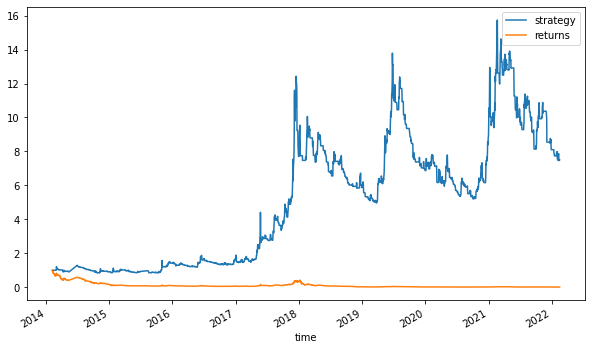

In [ ]:
df[['strategy','returns']].cumsum().apply(np.exp).plot(figsize=(10,6))